Applying Support Vector Machines to a new dataset
The new dataset I used to make this model was (https://www.kaggle.com/datasets/alxmamaev/flowers-recognitions)

Time to Unzip the files

In [12]:
import zipfile
import os

def unzip_files(zip_paths, extract_to):
    for zip_path in zip_paths:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

# Paths to the zip files
rose_zip = "/content/sample_data/rose.zip"
sunflower_zip = "/content/sample_data/sunflower.zip"

# Directory to extract to
extract_to = "/content/sample_data/flowers"

# Unzip files
unzip_files([rose_zip, sunflower_zip], extract_to)

**Read the Images**

In [13]:
import cv2
import os
import numpy as np

def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

rose_folder = "/content/sample_data/flowers/rose"
sunflower_folder = "/content/sample_data/flowers/sunflower"

rose_folder = read_images_from_folder(rose_folder)
sunflower_folder = read_images_from_folder(sunflower_folder)

print("Number of cat images:", len(rose_folder))
print("Number of dog images:", len(sunflower_folder))

Number of cat images: 784
Number of dog images: 733


**Step 2: Read and Preprocess Images**

In [14]:
import cv2

def read_images_from_folder(folder_path, size=(64, 64)):
    images = []
    labels = []  # Assuming you will use folder names as labels or some labeling logic
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, size)
                images.append(img.flatten())
    return images

# Read images from unzipped folders
rose_images = read_images_from_folder(os.path.join(extract_to, 'rose'))
sunflower_images = read_images_from_folder(os.path.join(extract_to, 'sunflower'))

**Step 3: Data Splitting, SVM**

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

# Combine data
X = np.array(rose_images + sunflower_images)
y = np.array([0] * len(rose_images) + [1] * len(sunflower_images))  # 0 for roses, 1 for sunflowers

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
])

# Grid search for the best parameters
param_grid = {
    'pca__n_components': [50, 100],
    'svm__C': [1, 10, 100],
    'svm__kernel': ['rbf']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'pca__n_components': 100, 'svm__C': 1, 'svm__kernel': 'rbf'}


**Step 4: Evaluate and Visualize Predictions**



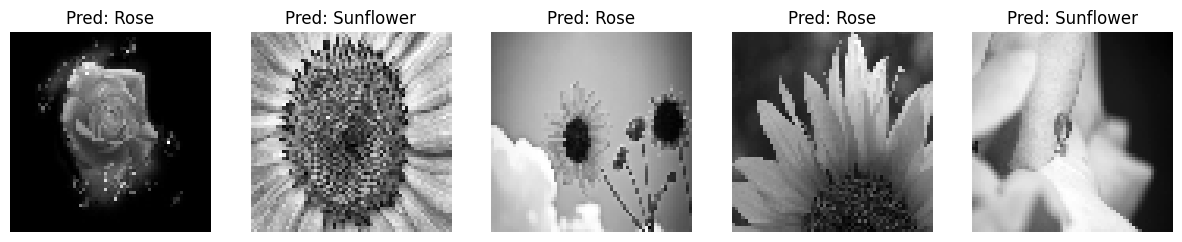

In [16]:
import matplotlib.pyplot as plt

# Predict on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Define label names for numeric labels
label_names = {0: 'Rose', 1: 'Sunflower'}

# Display some images with their predicted labels using the mapping
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')  # Assuming your images were flattened to 64x64
    # Use the label_names dictionary to get the string representation
    ax.set_title(f'Pred: {label_names[y_pred[i]]}')
    ax.axis('off')
plt.show()

# Combine data
X = np.array(rose_images + sunflower_images)
y = np.array([0] * len(rose_images) + [1] * len(sunflower_images))  # 0 for roses, 1 for sunflowers